# Exploring the derivatives

In [1]:
library(tidyverse)

options(repr.plot.width=12)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
load(file.path('../data', 'ecdc.rda'))

tbl_ecdc_threshold %>% 
    head()

date_rep,cases,deaths,country,geoId,country_code,population,continentExp,cumulative_reported,cumulative_deaths,days_since
<dttm>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2020-03-29,15,1,Afghanistan,AF,AFG,37172386,Asia,106,3,0
2020-03-30,8,1,Afghanistan,AF,AFG,37172386,Asia,114,4,1
2020-03-31,27,0,Afghanistan,AF,AFG,37172386,Asia,141,4,2
2020-04-01,25,0,Afghanistan,AF,AFG,37172386,Asia,166,4,3
2020-04-02,26,0,Afghanistan,AF,AFG,37172386,Asia,192,4,4
2020-04-03,43,0,Afghanistan,AF,AFG,37172386,Asia,235,4,5


We will take the top 12 countries. Later, we facet the plots into a 3x4 matrix, so 12 is a good number. 

In [3]:
tbl_top_countries <- tbl_ecdc %>% 
  group_by(country) %>% 
  summarise(max_cumul = max(cumulative_reported)) %>% 
  ungroup() %>% 
  arrange(desc(max_cumul)) %>% 
  head(12) %>%
  inner_join(tbl_ecdc_threshold, by = 'country')

tbl_top_countries

country,max_cumul,date_rep,cases,deaths,geoId,country_code,population,continentExp,cumulative_reported,cumulative_deaths,days_since
<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
United_States_of_America,825041,2020-03-03,14,4,US,USA,327167434,America,103,6,0
United_States_of_America,825041,2020-03-04,22,3,US,USA,327167434,America,125,9,1
United_States_of_America,825041,2020-03-05,34,2,US,USA,327167434,America,159,11,2
United_States_of_America,825041,2020-03-06,74,1,US,USA,327167434,America,233,12,3
United_States_of_America,825041,2020-03-07,105,2,US,USA,327167434,America,338,14,4
United_States_of_America,825041,2020-03-08,95,3,US,USA,327167434,America,433,17,5
United_States_of_America,825041,2020-03-09,121,4,US,USA,327167434,America,554,21,6
United_States_of_America,825041,2020-03-10,200,5,US,USA,327167434,America,754,26,7
United_States_of_America,825041,2020-03-11,271,2,US,USA,327167434,America,1025,28,8


We will change country column to a factor and order by the number of cumulative reported cases.

In [4]:
country_order <- tbl_top_countries %>% 
  group_by(country) %>% 
  summarise(max_reported = max(cumulative_reported)) %>% 
  arrange(desc(max_reported)) %>% 
  pull(country)

country_order

[1] "United_States_of_America" "Spain"                   
 [3] "Italy"                    "Germany"                 
 [5] "United_Kingdom"           "France"                  
 [7] "Turkey"                   "Iran"                    
 [9] "China"                    "Russia"                  
[11] "Brazil"                   "Belgium"

In [5]:
tbl_top_countries <- tbl_top_countries %>%
  mutate(
      country = factor(country)
      , country = fct_relevel(country, country_order)
  )

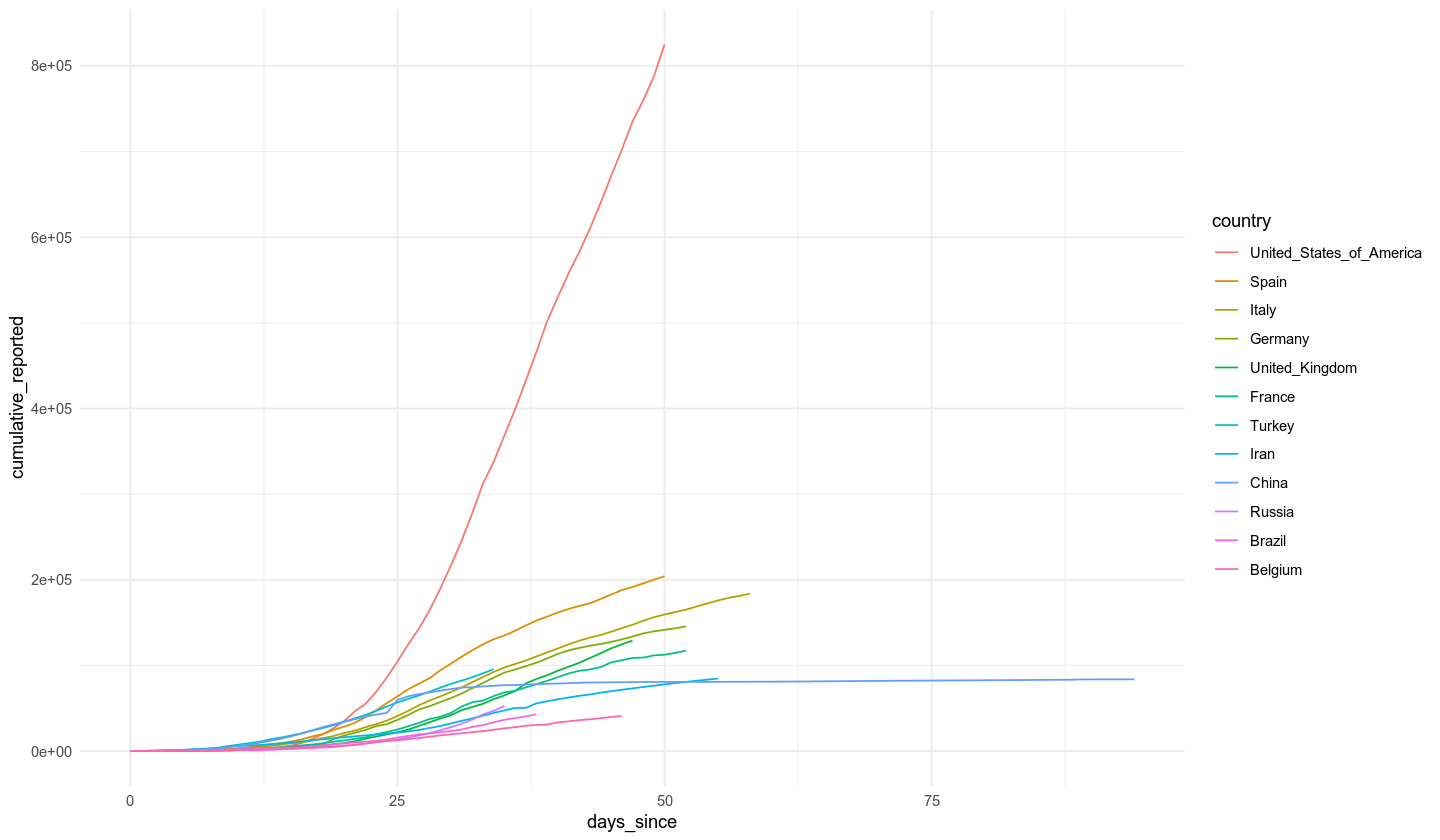

In [6]:
tbl_top_countries %>% 
  ggplot(aes(days_since, cumulative_reported, color = country)) + 
  geom_line() + 
  theme_minimal()

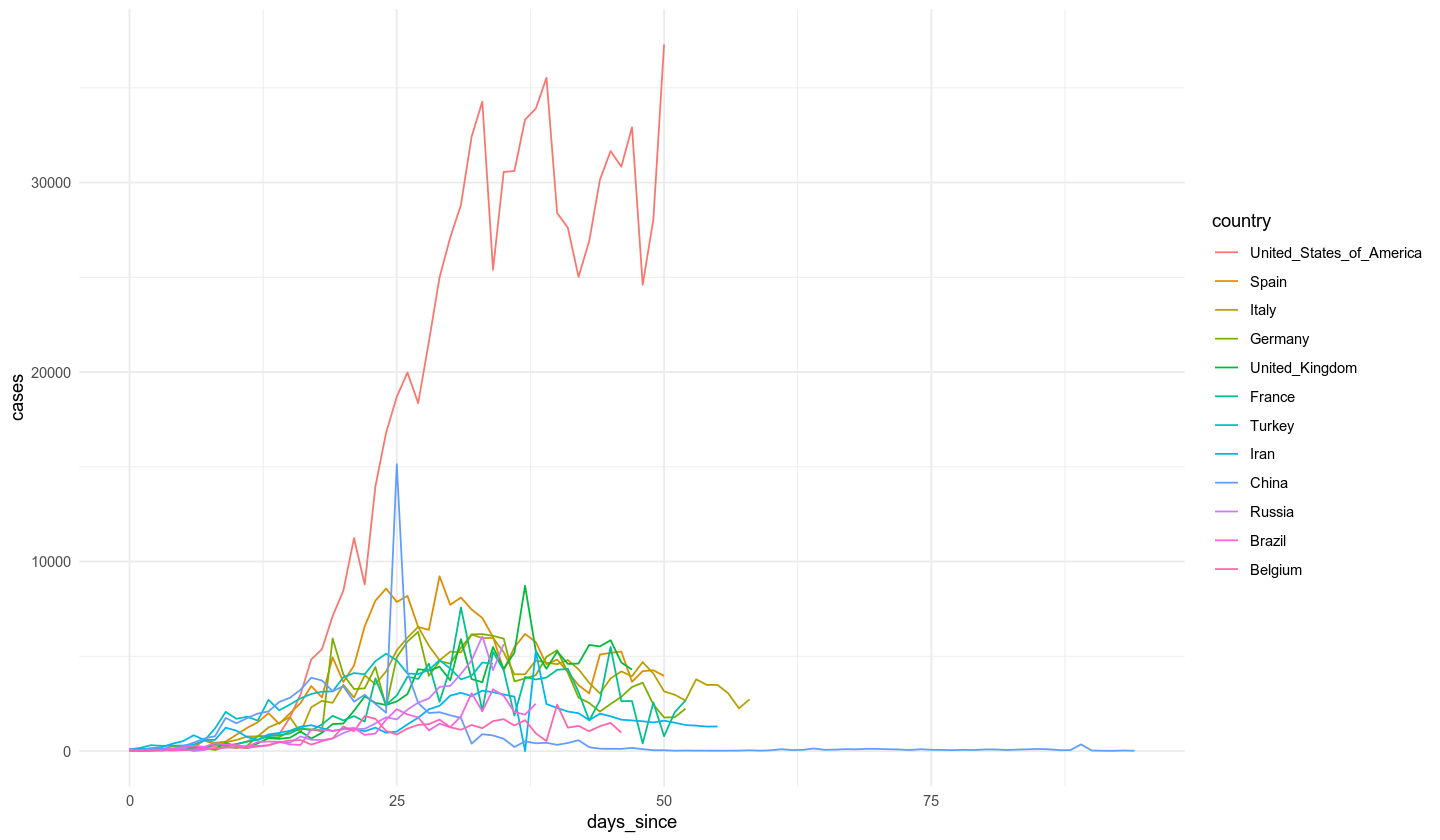

In [7]:
tbl_top_countries %>% 
  ggplot(aes(days_since, cases, color = country)) + 
  geom_line() + 
  theme_minimal()


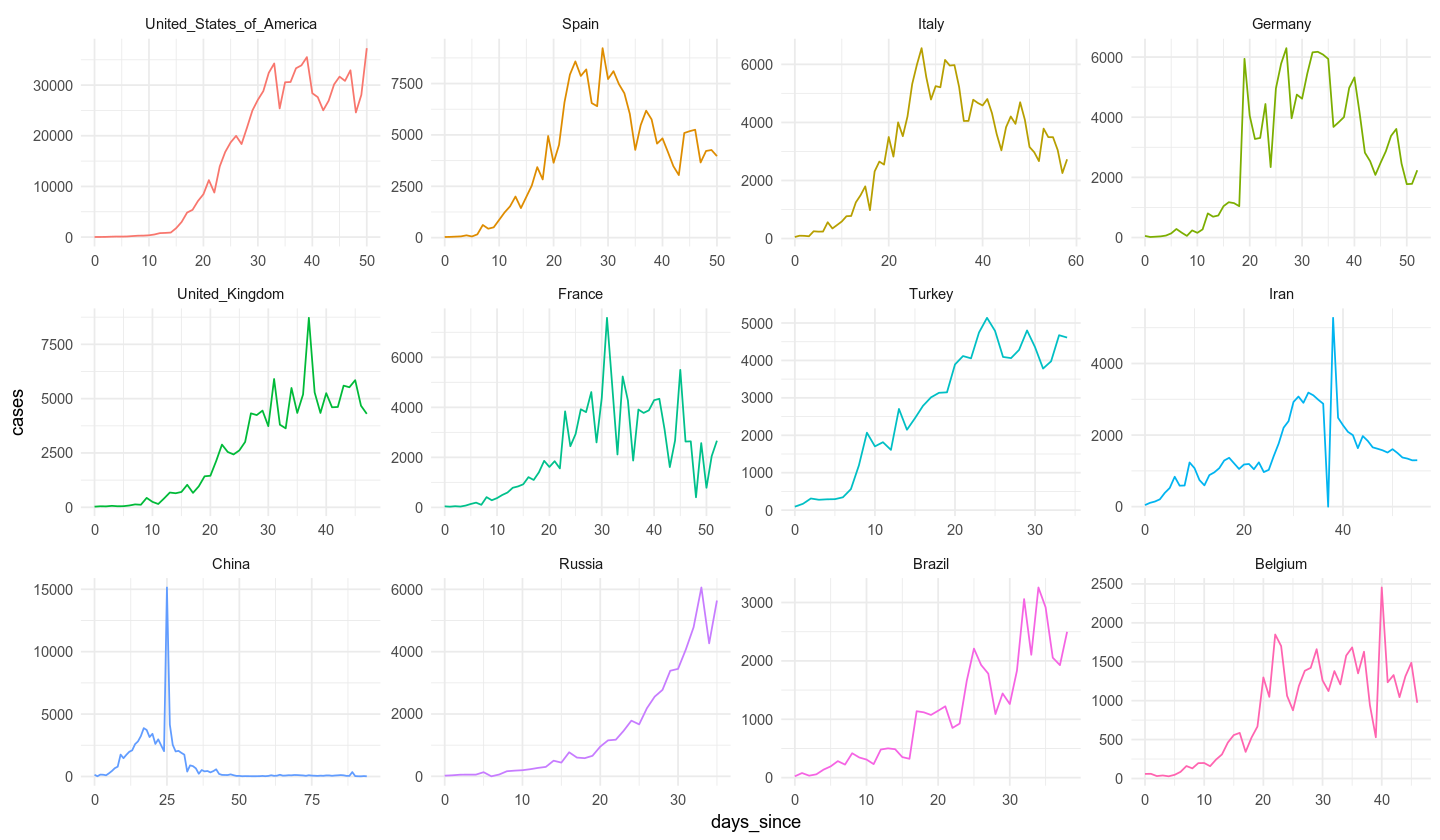

In [8]:
tbl_top_countries %>% 
  ggplot(aes(days_since, cases, color = country)) + 
  geom_line(show.legend = FALSE) + 
  theme_minimal() + 
  facet_wrap(~ country, scales = 'free')

In the plot above, we see that newly reported cases have peaked for most of the top countries. There are obviously any number of qualifiers for this, not least of which is the availability of testing and quality of official figures.

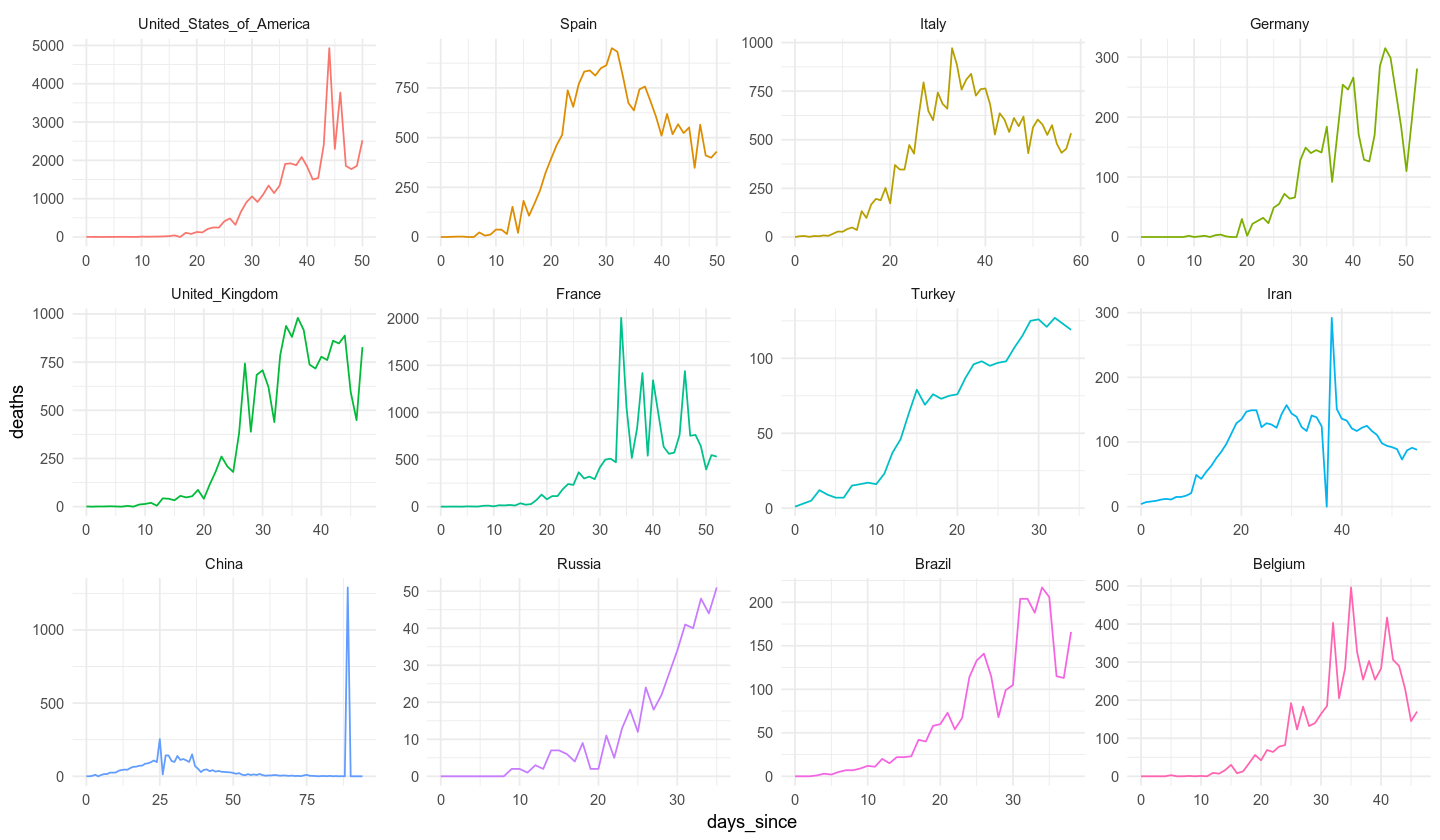

In [9]:
tbl_top_countries %>% 
  ggplot(aes(days_since, deaths, color = country)) + 
  geom_line(show.legend = FALSE) + 
  theme_minimal() + 
  facet_wrap(~ country, scales = 'free')